# Cifar10 Classification

## import libreries

In [38]:
import tensorflow as tfi
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras
from tensorflow.keras.layers import Conv2D, Dropout, MaxPool2D, AvgPool2D, Add, Dense 
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Input,Dropout, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D
from tensorflow.keras.models import Model, load_model,Sequential
from tensorflow.keras.initializers import glorot_uniform
import warnings

## Load dataset

In [39]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [40]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [41]:
#All the labels
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

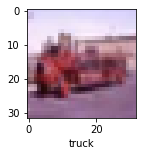

In [42]:
def plot_image(x,y,index):
  
  plt.figure(figsize = (2,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

plot_image(X_train,y_train,67)

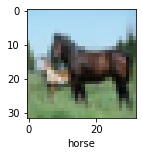

In [43]:
plot_image(X_train,y_train,12)

# Scaling the data

In [44]:
X_train = X_train/255
X_test = X_test/255

In [45]:
# Image = 32X32 pixels , 3D (RGB)
X_train.shape[1:]

(32, 32, 3)

# Data augmentation 


In [46]:
data_augmentation = tfi.keras.Sequential([
#  layers.experimental.preprocessing.RandomFlip("horizontal"),
  layers.experimental.preprocessing.RandomRotation(0.1),
  layers.experimental.preprocessing.RandomZoom(0.1)
])

# CNN

In [47]:
cnn = models.Sequential([
        
        #CNN
        #data_augmentation,
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape= X_train.shape[1:]),
        layers.BatchNormalization(),
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape= X_train.shape[1:]),
        layers.BatchNormalization(),
        layers.MaxPool2D(pool_size=(2,2),padding='same'),
        layers.Dropout(0.5),
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPool2D(pool_size=(2,2),padding='same'),
        layers.Dropout(0.4),
        layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.GlobalAvgPool2D(),
        layers.BatchNormalization(),

        #Fully connected
        layers.Flatten(),
        layers.BatchNormalization(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.4),
        layers.BatchNormalization(),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        Dense(10,activation = 'softmax')
])


"\nold\ncnn = models.Sequential([\n        \n        #CNN\n        #data_augmentation,\n        layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape= X_train.shape[1:]),\n        layers.MaxPool2D(pool_size=(2,2),padding='same'),\n        layers.Dropout(0.2),\n        layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),\n        layers.BatchNormalization(),\n        layers.MaxPool2D(pool_size=(2,2),padding='same'),\n        layers.Dropout(0.2),\n        layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),\n        layers.BatchNormalization(),\n        layers.GlobalAvgPool2D(),\n\n        #Fully connected\n        layers.Flatten(),\n        layers.BatchNormalization(),\n        layers.Dense(128, activation='relu'),\n        layers.Dropout(0.2),\n        layers.BatchNormalization(),\n        layers.Dense(64, activation='relu'),\n        layers.BatchNormalization(),\n        Dense(10,activation = 'softmax')\n])\n\n\n"

In [48]:
cnn.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [50]:
cnn.fit(X_train,y_train, epochs = 50)

Epoch 1/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4225 - accuracy: 0.4880
Epoch 2/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1801 - accuracy: 0.5837
Epoch 3/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0436 - accuracy: 0.6380
Epoch 4/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9508 - accuracy: 0.6708
Epoch 5/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8899 - accuracy: 0.6925
Epoch 6/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8366 - accuracy: 0.7131
Epoch 7/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7980 - accuracy: 0.7232
Epoch 8/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7590 - accuracy: 0.7397
Epoch 9/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7353 - accuracy: 0.7489
Epoch 10/50
1563/1563 [==============================] - 11s 7ms/step - l

In [51]:
#Return 0.78 accuracy
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.5805 - accuracy: 0.8113


[0.5805236101150513, 0.8112999796867371]

In [52]:
y_pred = cnn.predict(X_test)

In [53]:
y_predicted_classes = [np.argmax(img) for img in y_pred] 

# Predictions

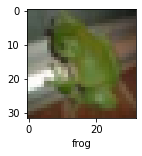

In [54]:
plot_image(X_test,y_predicted_classes, 7)

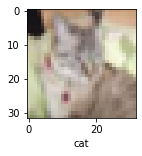

In [55]:
plot_image(X_test,y_predicted_classes, 8)

# Resnet

In [11]:
def identity_block(X, f, filters, stage, block):
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    # Retrieve Filters
    F1, F2, F3 = filters

    # Save the input value. We'll need this later to add back to the main path. 
    X_shortcut = X

    # First component of main path
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    # Second component of main path
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

In [12]:
def convolutional_block(X, f, filters, stage, block, s = 2):
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value
    X_shortcut = X


    ##### MAIN PATH #####
    # First component of main path 
    X = Conv2D(F1, (1, 1), strides = (s,s), name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    # Second component of main path
    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path
    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    
    ##### SHORTCUT PATH ####
    X_shortcut = Conv2D(F3, (1, 1), strides = (s,s), name = conv_name_base + '1', kernel_initializer = glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3, name = bn_name_base + '1')(X_shortcut)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    return X

In [13]:
def ResNet50(input_shape = (32, 32, 3), classes = 6):   
    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)
    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input)
    
    #UpSampling - makes the 32X32 shape works with Resnet Pooling layers
    X = layers.UpSampling2D((2,2))(X)
    X = layers.UpSampling2D((2,2))(X)
    X = layers.UpSampling2D((2,2))(X)

    # Stage 1
    X = Conv2D(64, (7, 7), strides = (2, 2), name = 'conv1', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = 'bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Stage 2
    X = convolutional_block(X, f = 3, filters = [64, 64, 256], stage = 2, block='a', s = 1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')

    # Stage 3
    X = convolutional_block(X, f = 3, filters = [128, 128, 512], stage = 3, block='a', s = 2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    # Stage 4
    X = convolutional_block(X, f = 3, filters = [256, 256, 1024], stage = 4, block='a', s = 2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    # Stage 5
    X = convolutional_block(X, f = 3, filters = [512, 512, 2048], stage = 5, block='a', s = 2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    # AVGPOOL.
    X = AveragePooling2D((2, 2), name='avg_pool')(X)

    # output layer
    X = Flatten()(X)
    X = Dropout(0.3)(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)
    
    # Create model
    model = Model(inputs = X_input, outputs = X, name='ResNet50')

    return model

In [15]:
resnet = ResNet50(input_shape=(256, 256, 3), classes = 10)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

In [ ]:
#Return 0.73 accuracy
model.fit(X_train, y_train, epochs = 10, batch_size = 64,validation_data=(X_test, y_test), shuffle=True)

Epoch 1/10


# DenseNet

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Dense
from tensorflow.keras.layers import AvgPool2D, GlobalAveragePooling2D, MaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import ReLU, concatenate
import tensorflow.keras.backend as K

# Creating Densenet121
def densenet(input_shape, n_classes, filters = 32):
    
    #batch norm + relu + conv
    def bn_rl_conv(x,filters,kernel=1,strides=1):
        
        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = Conv2D(filters, kernel, strides=strides,padding = 'same')(x)
        return x
    
    def dense_block(x, repetition):
        
        for _ in range(repetition):
            y = bn_rl_conv(x, 4*filters)
            y = bn_rl_conv(y, filters, 3)
            x = concatenate([y,x])
        return x
        
    def transition_layer(x):
        
        x = bn_rl_conv(x, K.int_shape(x)[-1] //2 )
        x = AvgPool2D(2, strides = 2, padding = 'same')(x)
        return x
    
    input = Input (input_shape)
    x = Conv2D(64, 7, strides = 2, padding = 'same')(input)
    x = MaxPool2D(3, strides = 2, padding = 'same')(x)
    
    for repetition in [6,12,24,16]:
        
        d = dense_block(x, repetition)
        x = transition_layer(d)
    x = GlobalAveragePooling2D()(d)

    output = Dense(n_classes, activation = 'softmax')(x)
    
    model = Model(input, output)
    return model


In [ ]:
model = densenet((32,32,3),10)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_257 (Conv2D)             (None, 16, 16, 64)   9472        input_7[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_14 (MaxPooling2D) (None, 8, 8, 64)     0           conv2d_257[0][0]                 
__________________________________________________________________________________________________
batch_normalization_274 (BatchN (None, 8, 8, 64)     256         max_pooling2d_14[0][0]           
_______________________________________________________________________________________

In [ ]:
#model.fit(X_train, y_train, epochs = 10, batch_size = 64, validation_data=(X_test, y_test), shuffle=True)

#Using pretrain models

In [ ]:

from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import tensorflow.keras as keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import tensorflow as tf
from keras.utils import np_utils
from keras.models import load_model
from keras.datasets import cifar10
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

In [ ]:
conv_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))


94773248/94765736 [==============================] - 7s 0us/step


In [ ]:
#conv_base.summary()


In [ ]:
model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(Dense(10,activation = 'softmax'))


In [ ]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#model.compile(optimizer=optimizers.RMSprop(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs = 5, batch_size = 20, validation_data=(X_test, y_test))

Epoch 1/5
1052/2500 [===========>..................] - ETA: 14:17 - loss: 2.0549 - accuracy: 0.3209

KeyboardInterrupt: ignored

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 22s 72ms/step - loss: 0.3402 - accuracy: 0.9035


[0.3402438759803772, 0.9035000205039978]